<a href="https://colab.research.google.com/github/aromaldev/OCR-Malayalam/blob/master/classification/deeplearning/CNN_With_P_ARTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN


B.R. Kavitha, C. Srimathi,
"Benchmarking on offline Handwritten Tamil Character Recognition using convolutional neural networks",
*Journal of King Saud University - Computer and Information Sciences*,
2019, 
ISSN 1319-1578,
https://doi.org/10.1016/j.jksuci.2019.06.004.

## Import the modules

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
import random
import string
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Import dataset to the runtime


In [3]:
!sh -c "mkdir dataset && cd dataset && unrar x /content/drive/MyDrive/OCR/Models/data/P-ARTS\ KAYYEZHUTHU\ MALAYALAM\ HANDWRITTEN\ DATASET/P-ARTS\ KAYYEZHUTHU\ MALAYALAM\ HANDWRITTEN\ DATASET.rar"

Streaming output truncated to the last 5000 lines.
Extracting  CHAR41/MD2091.jpg                                             95%  OK 
Extracting  CHAR41/MD2092.jpg                                             95%  OK 
Extracting  CHAR41/MD2093.jpg                                             95%  OK 
Extracting  CHAR41/MD2094.jpg                                             95%  OK 
Extracting  CHAR41/MD2095.jpg                                             95%  OK 
Extracting  CHAR41/MD2096.jpg                                             95%  OK 
Extracting  CHAR41/MD2097.jpg                                             95%  OK 
Extracting  CHAR41/MD2098.jpg                                             95%  OK 
Extracting  CHAR41/MD2099.jpg                                             95%  OK 
Extracting  CHAR41/MD21.jpg                                               95%  OK 
Extracting  CHAR41/MD210.jpg 

## Load the dataset

In [4]:
# Variable definitions
base_dir = 'dataset'   # image folder directory
img_per_class = 1000   # number of imagers to take 
img_height = 64        # image height and width (for resizing) 
img_width = 64


In [ ]:
# test if the above defined varibales are correct by selectng one image from the data set

img_folder = 'CHAR1'    #Folder where the image is located
file_name='MD100.jpg'
img_file = tf.io.read_file(os.path.join(base_dir,img_folder,file_name))
print(img_file)

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00V\x00V\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\

In [5]:
# Read files from base_dir and store in a list
# You can use tensorflow libraries instead
file_list = []
for directory,sub_dir,file_names in os.walk(base_dir):
    if sub_dir != []:
        class_names = sub_dir
    i=0
    for file in file_names:
        if i<img_per_class and (file.endswith('.jpg') or file.endswith('.JPG')):
            file_list.append(os.path.join(directory,file))
            i+=1
    if i!=0:
        print(f"{i} Images from : {directory}")

random.Random(45).shuffle(file_list)

#This line is reduntant
class_names = [ x[4:] for x in class_names]

class_names.sort()

1000 Images from : dataset/CHAR15
1000 Images from : dataset/CHAR36
1000 Images from : dataset/CHAR4
1000 Images from : dataset/CHAR31
1000 Images from : dataset/CHAR12
1000 Images from : dataset/CHAR27
1000 Images from : dataset/CHAR21
1000 Images from : dataset/CHAR20
1000 Images from : dataset/CHAR24
1000 Images from : dataset/CHAR41
1000 Images from : dataset/CHAR26
1000 Images from : dataset/CHAR11
1000 Images from : dataset/CHAR37
1000 Images from : dataset/CHAR38
1000 Images from : dataset/CHAR29
1000 Images from : dataset/CHAR34
1000 Images from : dataset/CHAR9
1000 Images from : dataset/CHAR42
1000 Images from : dataset/CHAR43
1000 Images from : dataset/CHAR28
1000 Images from : dataset/CHAR14
1000 Images from : dataset/CHAR18
1000 Images from : dataset/CHAR10
1000 Images from : dataset/CHAR16
1000 Images from : dataset/CHAR32
1000 Images from : dataset/CHAR35
1000 Images from : dataset/CHAR17
1000 Images from : dataset/CHAR3
1000 Images from : dataset/CHAR19
1000 Images from 

In [6]:
image_count = len(file_list)
print(f'Number of images : {image_count}')
print('\n'.join(file_list[:10]))
print(len(class_names))
print(class_names)

Number of images : 44000
dataset/CHAR18/MD1820.jpg
dataset/CHAR35/MD769.jpg
dataset/CHAR36/MD889.jpg
dataset/CHAR39/MD1394.jpg
dataset/CHAR23/MD507.jpg
dataset/CHAR11/MD1844.jpg
dataset/CHAR38/MD392.jpg
dataset/CHAR41/MD1478.jpg
dataset/CHAR29/MD508.jpg
dataset/CHAR33/MD202.jpg
44
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '5', '6', '7', '8', '9']


In [ ]:
# Save the loaded file list if needed
#pickle.dump(file_list,open('./pickles/20210608.pkl','wb'))

In [7]:
#file_list = pickle.load(open('/content/drive/MyDrive/OCR/Models/pickles/20210608.pkl','rb'))
image_count = len(file_list)
print(f'Number of images : {image_count}')
print('\n'.join(file_list[:10]))
len(class_names)

Number of images : 44000
dataset/CHAR18/MD1820.jpg
dataset/CHAR35/MD769.jpg
dataset/CHAR36/MD889.jpg
dataset/CHAR39/MD1394.jpg
dataset/CHAR23/MD507.jpg
dataset/CHAR11/MD1844.jpg
dataset/CHAR38/MD392.jpg
dataset/CHAR41/MD1478.jpg
dataset/CHAR29/MD508.jpg
dataset/CHAR33/MD202.jpg


44

In [8]:
#load the file list
# dataset = tf.data.Dataset.list_files(str(base_dir+'/*/*'),shuffle=False) # this can be used instead of the for loop above
dataset = tf.data.Dataset.from_tensor_slices(file_list)

#shuffle the data
# The file list has already been shuffled
#dataset = dataset.shuffle(image_count, reshuffle_each_iteration=False)

for f in dataset.take(10):
    print(f.numpy())
#Print the class names
#class_names = np.array(sorted[item.name for item in data])

b'dataset/CHAR18/MD1820.jpg'
b'dataset/CHAR35/MD769.jpg'
b'dataset/CHAR36/MD889.jpg'
b'dataset/CHAR39/MD1394.jpg'
b'dataset/CHAR23/MD507.jpg'
b'dataset/CHAR11/MD1844.jpg'
b'dataset/CHAR38/MD392.jpg'
b'dataset/CHAR41/MD1478.jpg'
b'dataset/CHAR29/MD508.jpg'
b'dataset/CHAR33/MD202.jpg'


In [9]:
# Get the number of item in the dataset
print(tf.data.experimental.cardinality(dataset).numpy())

44000


In [10]:
# Returns the label as a tensor
def get_label (file_name):

    parts = tf.strings.substr(tf.strings.split(file_name,os.path.sep)[-2],4,-1)
    #parts = tf.strings.split(file_name,os.path.sep)[-2] 

    one_hot = parts == class_names

    return tf.argmax(one_hot)

# Function to import the images
def decode_image(img_file,image_type=None,resize_shape=None, channels=0):
    #img_file = tf.io.read_file(img_file)
    if image_type == 'jpeg' or image_type == 'jpg':
        img_decoded = tf.image.decode_jpeg(img_file,channels=channels)
    elif image_type == 'png':
        img_decoded = tf.image.decode_png(img_file,channels=channels)
    else:
        img_decoded = tf.image.decode_image(img_file,channels=channels)
    
    if (image_type in ['jpeg','jpg', 'png']) and resize_shape != None:
        img_decoded = tf.image.resize(img_decoded,resize_shape,method='lanczos3')
    img_decoded = tf.image.rgb_to_grayscale(img_decoded)
    #img_decoded = tf.cast(img_decoded,dtype=tf.float32)
    #img_decoded = tf.math.l2_normalize(img_decoded)
    return img_decoded


def process_path(file_name):
    label = get_label(file_name)
    
    #Load the raw data
    img = tf.io.read_file(file_name)
    img = decode_image(img,'jpeg',resize_shape=(img_width,img_height),channels=3)
    
    return img,label

In [13]:
# Load the dataset
dataset_img = dataset.map(process_path)

In [14]:
val_size = int(image_count * 0.2)
train_ds_img = dataset_img.skip(val_size)
test_ds_img  = dataset_img.take(val_size)

print(tf.data.experimental.cardinality(train_ds_img).numpy())
print(tf.data.experimental.cardinality(test_ds_img).numpy())

35200
8800


In [15]:
# High time Consumption on huge datasets
#tf.data.experimental.save(train_ds_img, 'training_datathirtyclasses')
#tf.data.experimental.save(test_ds_img, 'test_data_thirtyclasses')
#ds = tf.data.experimental.load('training_data')

print(dataset_img.take(64))

<TakeDataset shapes: ((64, 64, 1), ()), types: (tf.float32, tf.int64)>


### Train test split

In [16]:
batch_size = 64

train_batchs = train_ds_img.batch(batch_size)
test_batchs = test_ds_img.batch(batch_size)
print (f"Number of Training batchs: {tf.data.experimental.cardinality(train_batchs).numpy()}")
print (f"Number of Testing batchs: {tf.data.experimental.cardinality(test_batchs).numpy()}")

#for x,y in train_batchs.take(5):
#    print(y.numpy())'''

Number of Training batchs: 550
Number of Testing batchs: 138


## Model Creation

In [17]:
num_classes = len(class_names)

  
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Dropout(0.1,seed=4),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.2,seed=9),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.3,seed=12),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.4,seed=34),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dropout(0.5,seed=1),
  layers.Dense(200, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
#model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 16)        160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)       

In [ ]:
#mkdir pickles/checkpoint20200608
checkpoint_filepath = './pickles/parts_20210621.chk'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='auto',
    save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10)

In [ ]:
epochs=50
history = model.fit(
  train_batchs,
  epochs=epochs,
  callbacks = [model_checkpoint_callback,early_stopping],
  validation_data=test_batchs,
  )

Epoch 1/50
550/550 [==============================] - 391s 703ms/step - loss: 2.8501 - accuracy: 0.3781 - val_loss: 0.8334 - val_accuracy: 0.8477
Epoch 2/50
550/550 [==============================] - 389s 700ms/step - loss: 0.7013 - accuracy: 0.7793 - val_loss: 0.3261 - val_accuracy: 0.9410
Epoch 3/50
550/550 [==============================] - 390s 702ms/step - loss: 0.4129 - accuracy: 0.8715 - val_loss: 0.2377 - val_accuracy: 0.9514
Epoch 4/50
550/550 [==============================] - 390s 701ms/step - loss: 0.2920 - accuracy: 0.9097 - val_loss: 0.1045 - val_accuracy: 0.9883
Epoch 5/50
550/550 [==============================] - 388s 698ms/step - loss: 0.2129 - accuracy: 0.9322 - val_loss: 0.0862 - val_accuracy: 0.9852
Epoch 6/50
550/550 [==============================] - 389s 700ms/step - loss: 0.1823 - accuracy: 0.9441 - val_loss: 0.1420 - val_accuracy: 0.9694
Epoch 7/50
550/550 [==============================] - 386s 695ms/step - loss: 0.1638 - accuracy: 0.9496 - val_loss: 0.0425 -

### Plot the metrics

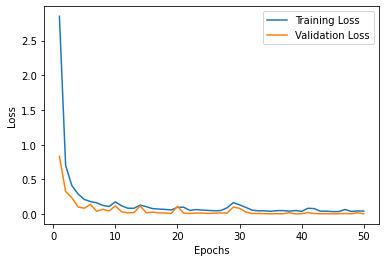

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss_values , label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

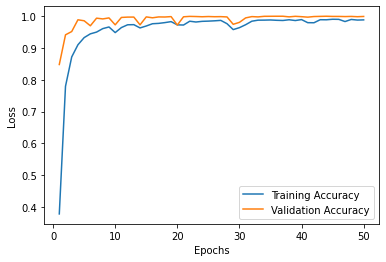

In [ ]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, label='Training Accuracy')
plt.plot(epochs, val_acc_values, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Save the model

In [ ]:
name = 'parts_20210621'
model.save(str('/content/drive/MyDrive/OCR/Models/pickles/'+name+'.h5'),save_format='h5')

## Loading saved model

In [18]:
model = Sequential()
name = 'parts_20210621'
model = keras.models.load_model(str('/content/drive/MyDrive/OCR/Models/pickles/'+name+'.h5'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 16)        160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)       

In [ ]:
evaluation=model.evaluate(test_batchs,return_dict=True)

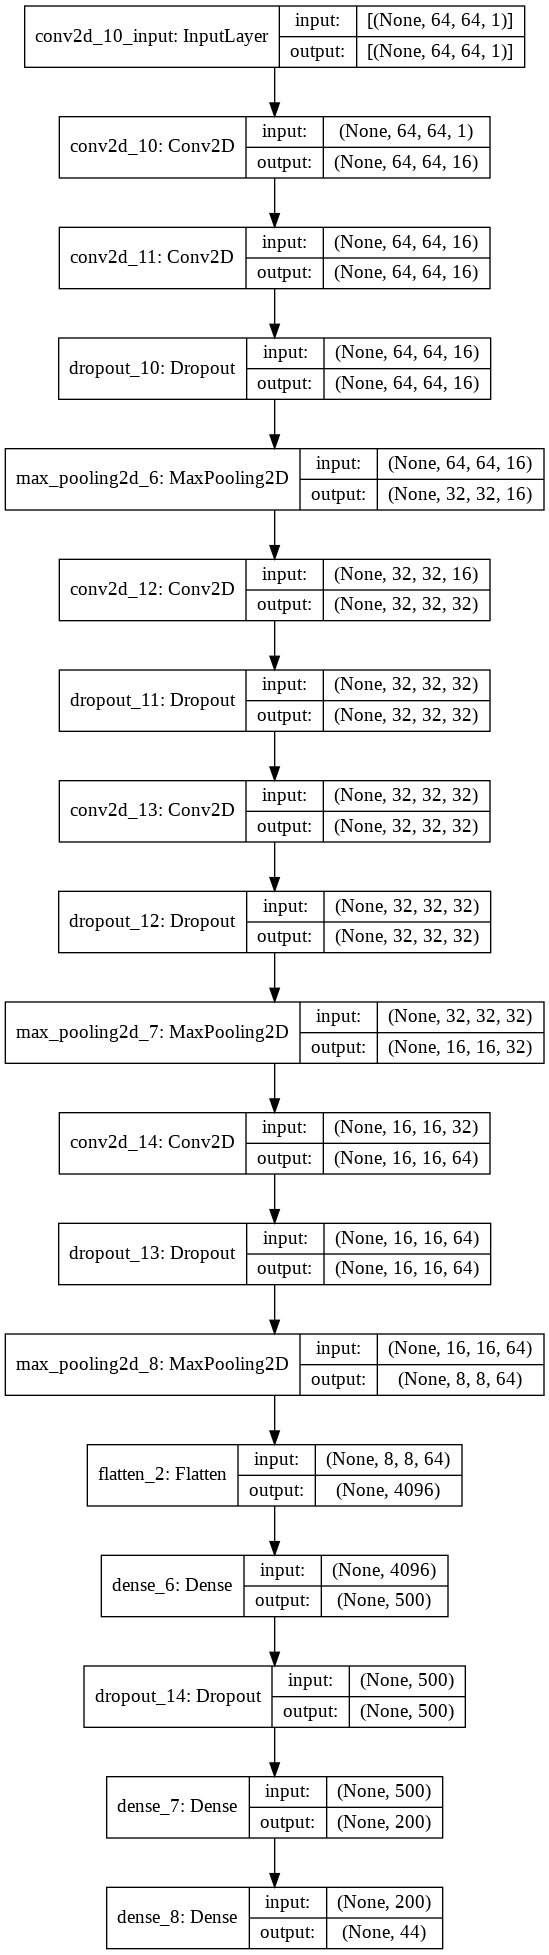

In [20]:
dot_img_file = './plot.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [21]:
y_predict = model.predict(test_batchs)

In [22]:
print(type(y_predict))
print(test_ds_img)

<class 'numpy.ndarray'>
<TakeDataset shapes: ((64, 64, 1), ()), types: (tf.float32, tf.int64)>


In [23]:
Y_test = []
y_act_predict = np.argmax(y_predict,axis=1)

print(y_act_predict.shape)
for img,label in test_ds_img.as_numpy_iterator():
    Y_test.append(label)
Y_test = np.array(Y_test)
print(Y_test.shape)

assert Y_test.shape== y_act_predict.shape

(8800,)
(8800,)


In [24]:
print(classification_report(Y_test,y_act_predict))
con_mat = confusion_matrix(Y_test,y_act_predict)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       185
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       193
           3       1.00      1.00      1.00       187
           4       1.00      1.00      1.00       205
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00       212
           7       1.00      1.00      1.00       207
           8       1.00      1.00      1.00       204
           9       1.00      1.00      1.00       216
          10       1.00      1.00      1.00       184
          11       1.00      1.00      1.00       195
          12       1.00      1.00      1.00       225
          13       1.00      1.00      1.00       194
          14       1.00      1.00      1.00       192
          15       1.00      1.00      1.00       199
          16       1.00      0.99      1.00       186
          17       0.99    

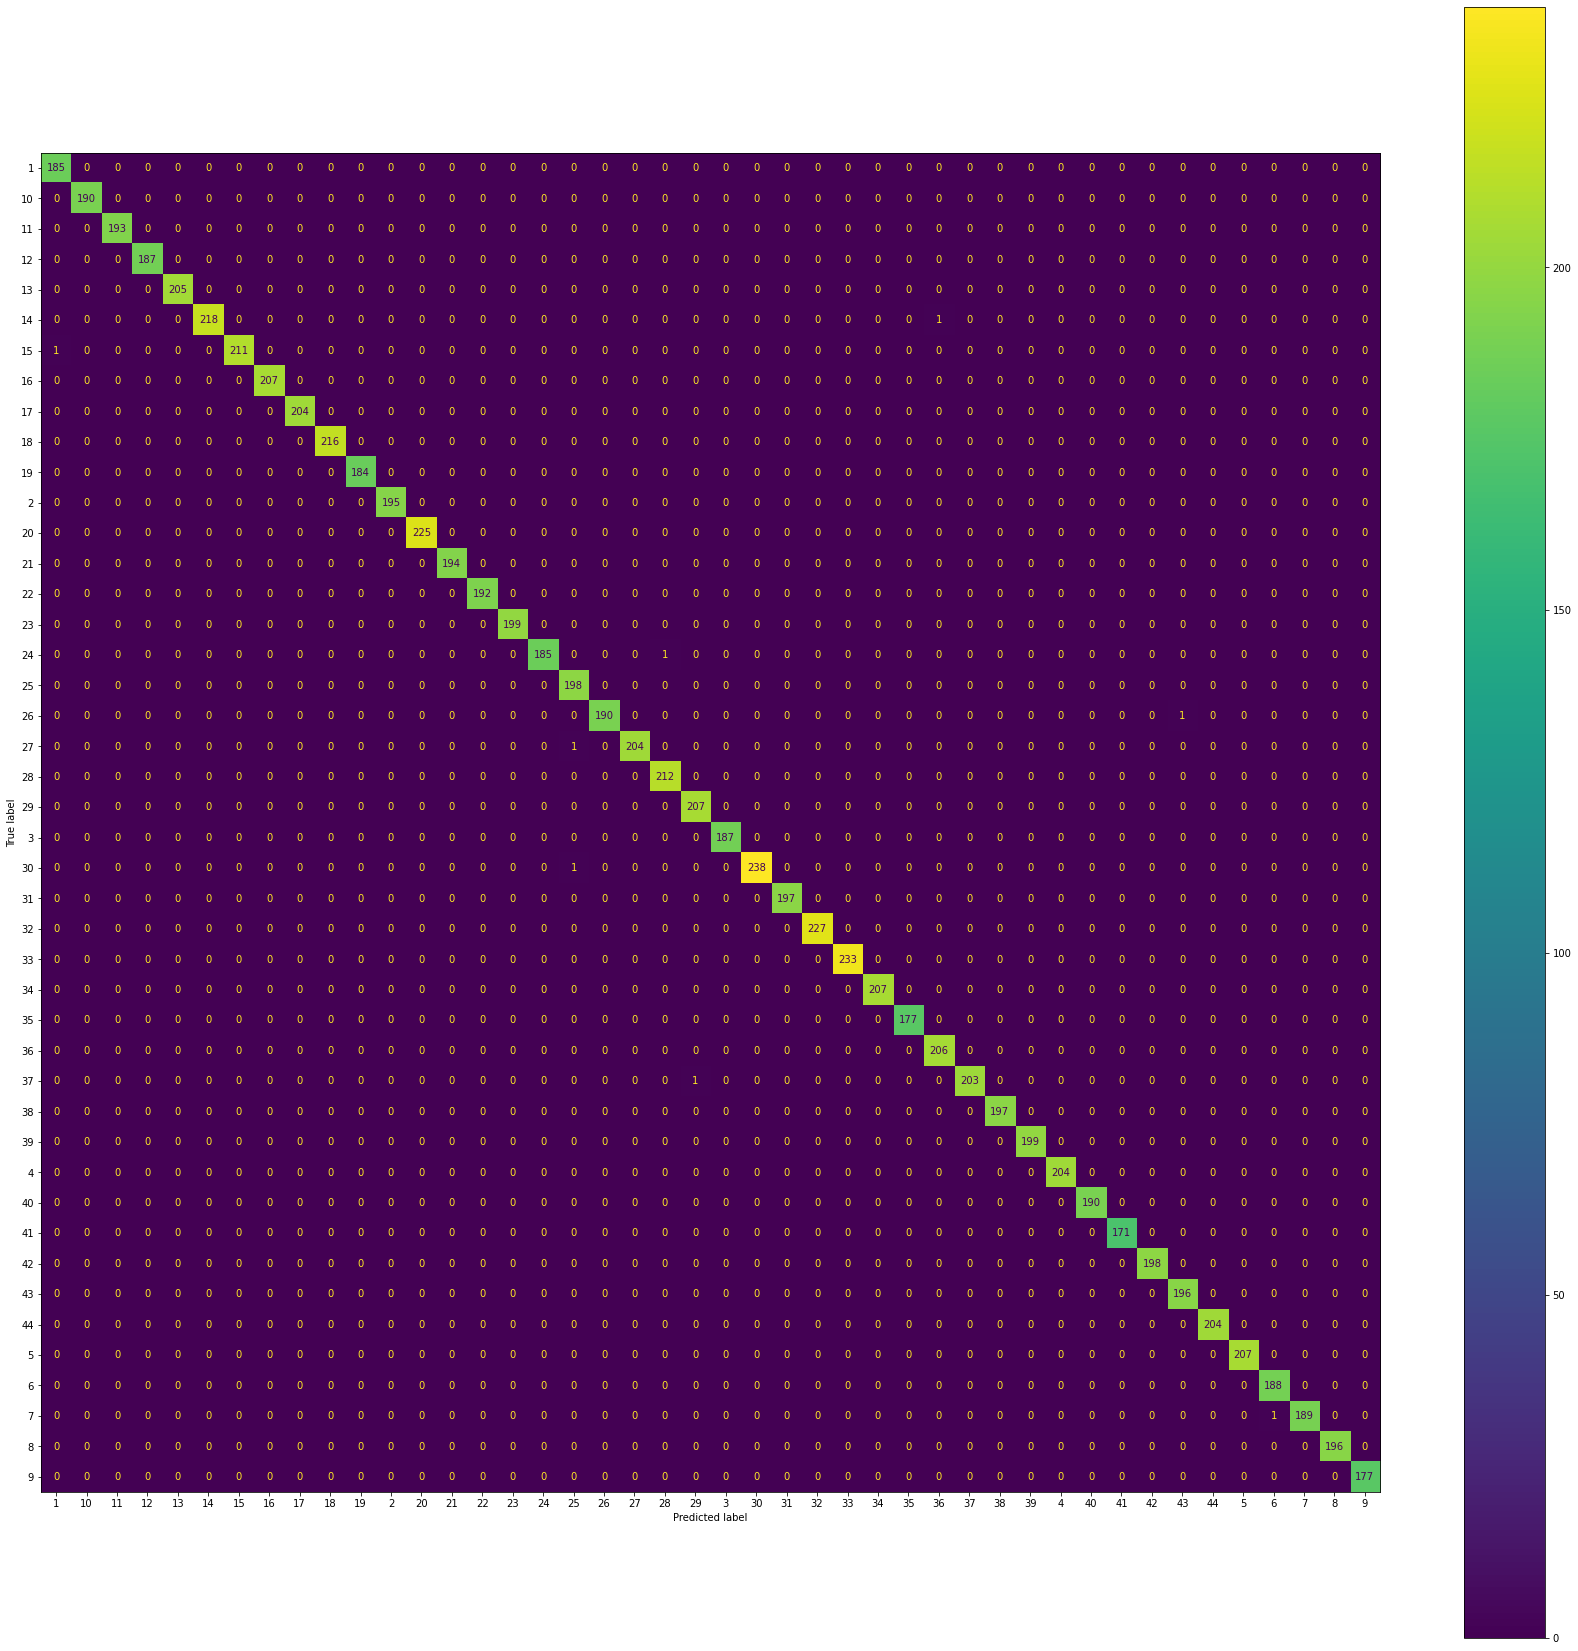

In [30]:
fig, ax = plt.subplots(figsize=(30, 30))
ConfusionMatrixDisplay(con_mat,class_names).plot(ax=ax,values_format = 'd')

### Test the model with an image from the dataset

In [39]:
mal_dict = {
    1 :  ("05",),
    2 : ("06",),
    3 : ("07",),
    4 : ("09",),
    5 : ("0b",),
    6 : ("0e",),
    7 : ("0f",),
    8 : ("12",),
    9 : ("15",),
    10: ("16",),
    11: ("17",),
    12: ("18",),
    13: ("19",),
    14: ("1a",),
    15: ("1b",),
    16: ("1c",),
    17: ("1d",),
    18: ("1e",),
    19: ("1f",),
    20: ("20",),
    21: ("21",),
    22: ("22",),
    23: ("23",),
    24: ("24",),
    25: ("25",),
    26: ("26",),
    27: ("27",),
    28: ("28",),
    29: ("2a",),
    30: ("2b",),
    31: ("2c",),
    32: ("2d",),
    33: ("2e",),
    34: ("2f",),
    35: ("30",),
    36: ("32",),
    37: ("35",),
    38: ("36",),
    39: ("37",),
    40: ("38",),
    41: ("39",),
    44: ("33",),
    42: ("34",),
    43: ("31",),
}
prefix = "0x0d"
mal_char_dict = {}
for x in mal_dict.keys():
    char_tuple = mal_dict[x]
    char = [prefix + a for a in char_tuple]
    chr_str = ''.join([chr(int(a,16)) for a in char])   
    #print(f"{x:03} : {chr_str:6}{str(char)}")
    
    mal_char_dict[x] = chr_str.encode('utf-8')

In [48]:
img_pos = random.randint(0,len(file_list))
img_file = file_list[img_pos]
img_label = int(img_file.split('/')[-2][4:])
img = process_path(img_file)

Image Label: ഒ


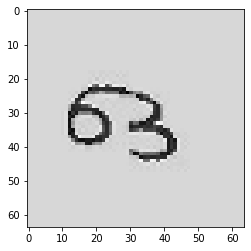

In [49]:
print(f"Image Label: {mal_char_dict[img_label].decode('utf-8')}")
plt.imshow(img[0].numpy().reshape((64,64)),"gray")

In [50]:
num_of_test = 1

test_image = tf.data.Dataset.from_tensor_slices([img_file])
test_image = test_image.map(process_path)
test_image = test_image.batch(num_of_test)

prediction = model.predict(test_image)
predicted_name = int(str(class_names[np.argmax(prediction, axis=1)[0]]))

if predicted_name == img_label:
    print(f"Correctly predicted: {mal_char_dict[predicted_name].decode('utf-8')}")
else:
    print(f"Incorrect prediction: predicted_value: {mal_char_dict[predicted_name].decode('utf-8')}, True value: {mal_char_dict[predicted_name].decode('utf-8')}")
    print(f"file_name: {img_file}")


Correctly predicted: ഒ
